In [197]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [198]:
from sklearn.model_selection import train_test_split

### Unione tabelle

In [199]:
import pandas as pd

# Supponiamo di avere due DataFrame df1 e df2
df_train_reg = pd.read_csv('train_reg.csv')

df_train = pd.read_csv('train_log.csv')

# Eseguiamo la left join
df_train = pd.merge(df_train, df_train_reg, on='originalTitle', how='left')
df_train.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ratingMean,ReviewsTotal,averageRating
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,40,0.000000,6.659294,0.693147,0.000000,21,tvEpisode,0.000000,False,False,1,['US'],"Action,Adventure,Animation",7.5,0.693147,7.5
1,Looping,"(5, 6]",1982,28,0.000000,2.484907,0.693147,0.000000,1,videoGame,0.000000,False,False,1,['XWG'],Action,5.5,0.000000,5.9
2,Idealnaya para,"(5, 6]",1992,92,0.000000,3.663562,0.693147,0.000000,24,movie,0.000000,False,False,1,['RU'],Comedy,5.5,0.693147,5.7
3,MasterChef Celebrity México,"(5, 6]",2021,53,0.000000,2.772589,3.135494,0.000000,56,tvSeries,0.000000,True,False,1,['MX'],Reality-TV,5.5,0.000000,5.7
4,Seutateueob,"(7, 8]",2020,80,0.693147,9.662625,5.852202,1.098612,47,tvSeries,0.693147,True,False,32,['KR'],"Comedy,Drama,Romance",7.5,6.124683,8.0


# Simple Regression

### Reviews - numVotes

#### Reg

In [200]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [201]:
# Selezioniamo la variabile indipendente (input) e la variabile dipendente (target)
X = df_train[['ReviewsTotal']]
y = df_train['numVotes']

# Dividiamo i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Creiamo il modello di regressione lineare
model = LinearRegression()

# Addestriamo il modello sui dati di addestramento
model.fit(X_train, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test)

# Calcoliamo le metriche di valutazione del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Coefficients: 
 [1.20439125]
Intercept: 
 3.021965698220489


In [202]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.668
MSE: 0.994
MAE: 0.779


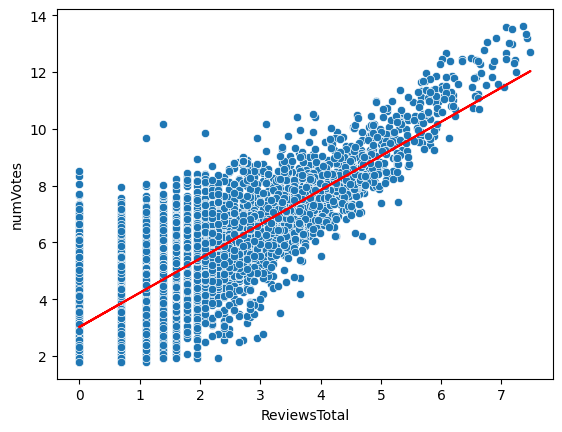

In [203]:
sns.scatterplot(data=df_train, x="ReviewsTotal", y="numVotes")
plt.plot(X, model.coef_[0]*X+model.intercept_, c="red")

#### DecisionTree

In [204]:
from sklearn.tree import DecisionTreeRegressor

In [205]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
import numpy as np

# Definisci la griglia dei parametri (solo max_depth)
param_dist = {
    'max_depth': randint(1, 20)
}

# Crea il modello
model = DecisionTreeRegressor()

# Definisci le metriche di valutazione
scoring = {
    'R2': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error)
}

# Esegui la Random Search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=10, scoring=scoring, refit='R2', random_state=42)
random_search.fit(X_train, y_train)

# Stampa i migliori parametri trovati
print("Best parameters found: ", random_search.best_params_)

# Stampa i punteggi per le metriche
print("Best R2: ", random_search.best_score_)
print("Best MSE: ", random_search.cv_results_['mean_test_MSE'][random_search.best_index_])
print("Best MAE: ", random_search.cv_results_['mean_test_MAE'][random_search.best_index_])

Best parameters found:  {'max_depth': 5}
Best R2:  0.6602853621421849
Best MSE:  1.0288868150279837
Best MAE:  0.7997629961065449


In [206]:
# Crea il modello
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # Use X_test for predictions
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
y_pred

R2: 0.671
MSE: 0.986
MAE: 0.778


array([3.05561579, 8.50787667, 6.45042009, ..., 3.05561579, 4.71212798,
       3.78492308])

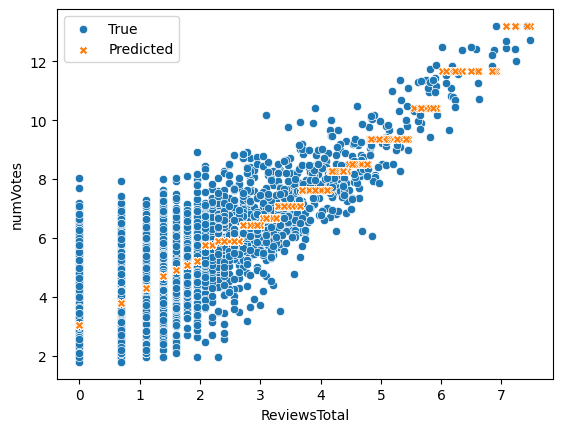

In [207]:
# Crea un nuovo DataFrame con le previsioni
df_test = pd.DataFrame({
    'ReviewsTotal': df_train.loc[X_test.index, 'ReviewsTotal'],
    'numVotes': y_test,
    'Predicted': y_pred
})

# Crea il grafico usando il nuovo DataFrame
sns.scatterplot(data=df_test, x="ReviewsTotal", y="numVotes", label="True")
sns.scatterplot(data=df_test, x="ReviewsTotal", y="Predicted", label="Predicted", marker="X")
plt.legend()
plt.show()

#### KNN Regressor

In [208]:
from sklearn.neighbors import KNeighborsRegressor

In [209]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Lista dei valori di k da testare, includendo anche k=50
k_values = list(range(1, 128))

# Dizionari per memorizzare i risultati
results = {
    'k': [],
    'R2': [],
    'MSE': [],
    'MAE': []
}

# Loop attraverso i diversi valori di k
for k in k_values:
    # Crea e addestra il modello
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train, y_train)
    
    # Fai le previsioni sui dati di test
    y_pred = reg.predict(X_test)
    
    # Calcola le metriche
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Memorizza i risultati
    results['k'].append(k)
    results['R2'].append(r2)
    results['MSE'].append(mse)
    results['MAE'].append(mae)

# Stampa i risultati
for i in range(len(k_values)):
    print(f"k={results['k'][i]}: R2={results['R2'][i]:.3f}, MSE={results['MSE'][i]:.3f}, MAE={results['MAE'][i]:.3f}")

k=1: R2=0.588, MSE=1.235, MAE=0.857
k=2: R2=0.581, MSE=1.255, MAE=0.880
k=3: R2=0.569, MSE=1.291, MAE=0.923
k=4: R2=0.550, MSE=1.348, MAE=0.948
k=5: R2=0.595, MSE=1.214, MAE=0.882
k=6: R2=0.614, MSE=1.158, MAE=0.859
k=7: R2=0.639, MSE=1.081, MAE=0.824
k=8: R2=0.655, MSE=1.035, MAE=0.801
k=9: R2=0.642, MSE=1.073, MAE=0.833
k=10: R2=0.648, MSE=1.055, MAE=0.820
k=11: R2=0.653, MSE=1.040, MAE=0.814
k=12: R2=0.655, MSE=1.033, MAE=0.809
k=13: R2=0.664, MSE=1.007, MAE=0.790
k=14: R2=0.661, MSE=1.014, MAE=0.794
k=15: R2=0.666, MSE=1.001, MAE=0.783
k=16: R2=0.668, MSE=0.994, MAE=0.778
k=17: R2=0.668, MSE=0.995, MAE=0.780
k=18: R2=0.666, MSE=1.001, MAE=0.783
k=19: R2=0.665, MSE=1.002, MAE=0.778
k=20: R2=0.665, MSE=1.004, MAE=0.777
k=21: R2=0.663, MSE=1.008, MAE=0.777
k=22: R2=0.666, MSE=1.000, MAE=0.781
k=23: R2=0.666, MSE=1.001, MAE=0.783
k=24: R2=0.666, MSE=1.000, MAE=0.780
k=25: R2=0.665, MSE=1.005, MAE=0.779
k=26: R2=0.665, MSE=1.004, MAE=0.787
k=27: R2=0.665, MSE=1.002, MAE=0.783
k=28: R2=0

In [210]:
reg = KNeighborsRegressor(n_neighbors=81)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.668
MSE: 0.993
MAE: 0.775


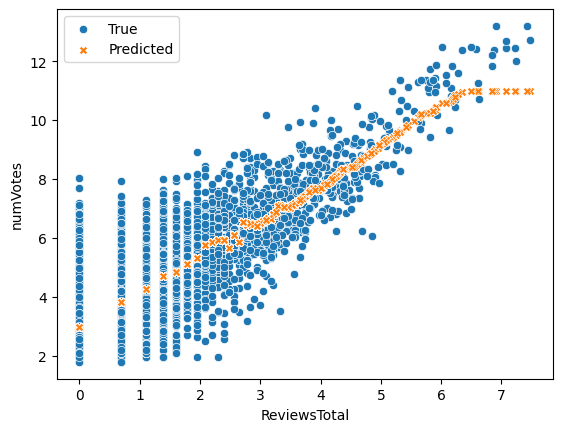

In [211]:
# Crea un nuovo DataFrame con le previsioni
df_test = pd.DataFrame({
    'ReviewsTotal': df_train.loc[X_test.index, 'ReviewsTotal'],
    'numVotes': y_test,
    'Predicted': y_pred
})

# Crea il grafico usando il nuovo DataFrame
sns.scatterplot(data=df_test, x="ReviewsTotal", y="numVotes", label="True")
sns.scatterplot(data=df_test, x="ReviewsTotal", y="Predicted", label="Predicted", marker="X")
plt.legend()
plt.show()

### ReviewsTotal - ratingMean

#### Reg

In [212]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [213]:
# Selezioniamo la variabile indipendente (input) e la variabile dipendente (target)
X = df_train[['ReviewsTotal']]
y = df_train['averageRating']

# Dividiamo i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Creiamo il modello di regressione lineare
model = LinearRegression()

# Addestriamo il modello sui dati di addestramento
model.fit(X_train, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test)

# Calcoliamo le metriche di valutazione del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Coefficients: 
 [-0.15132869]
Intercept: 
 6.979314700669276


In [214]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.010
MSE: 1.604
MAE: 0.969


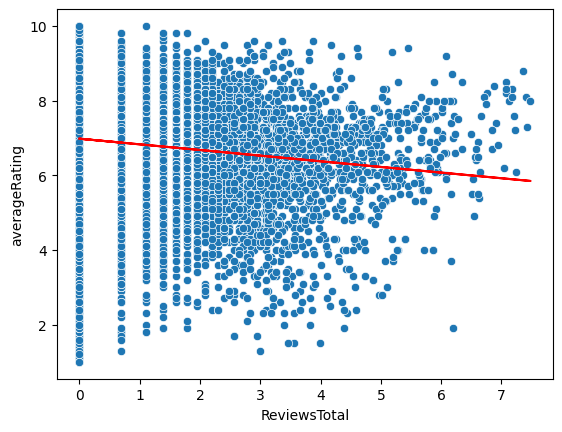

In [215]:
sns.scatterplot(data=df_train, x="ReviewsTotal", y="averageRating")
plt.plot(X, model.coef_[0]*X+model.intercept_, c="red")

#### DecisionTree

In [216]:
from sklearn.tree import DecisionTreeRegressor

In [217]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
import numpy as np

# Definisci la griglia dei parametri (solo max_depth)
param_dist = {
    'max_depth': randint(1, 20)
}

# Crea il modello
model = DecisionTreeRegressor()

# Definisci le metriche di valutazione
scoring = {
    'R2': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error)
}

# Esegui la Random Search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=10, scoring=scoring, refit='R2', random_state=42)
random_search.fit(X_train, y_train)

# Stampa i migliori parametri trovati
print("Best parameters found: ", random_search.best_params_)

# Stampa i punteggi per le metriche
print("Best R2: ", random_search.best_score_)
print("Best MSE: ", random_search.cv_results_['mean_test_MSE'][random_search.best_index_])
print("Best MAE: ", random_search.cv_results_['mean_test_MAE'][random_search.best_index_])

Best parameters found:  {'max_depth': 3}
Best R2:  0.020700627642481196
Best MSE:  1.5944050109072907
Best MAE:  0.9715257374261812


In [218]:
# Crea il modello
model = DecisionTreeRegressor(max_depth=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # Use X_test for predictions
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
y_pred

R2: -0.005
MSE: 1.628
MAE: 0.973


array([6.98409401, 6.98409401, 6.94109589, ..., 6.98409401, 6.65192308,
       6.76233766])

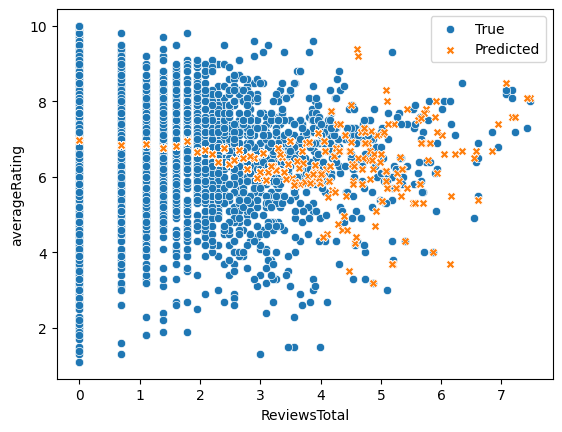

In [219]:
# Crea un nuovo DataFrame con le previsioni
df_test = pd.DataFrame({
    'ReviewsTotal': df_train.loc[X_test.index, 'ReviewsTotal'],
    'averageRating': y_test,
    'Predicted': y_pred
})

# Crea il grafico usando il nuovo DataFrame
sns.scatterplot(data=df_test, x="ReviewsTotal", y="averageRating", label="True")
sns.scatterplot(data=df_test, x="ReviewsTotal", y="Predicted", label="Predicted", marker="X")
plt.legend()
plt.show()

#### KNN Regressor

In [220]:
from sklearn.neighbors import KNeighborsRegressor

In [221]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Lista dei valori di k da testare, includendo anche k=50
k_values = list(range(1, 128))

# Dizionari per memorizzare i risultati
results = {
    'k': [],
    'R2': [],
    'MSE': [],
    'MAE': []
}

# Loop attraverso i diversi valori di k
for k in k_values:
    # Crea e addestra il modello
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train, y_train)
    
    # Fai le previsioni sui dati di test
    y_pred = reg.predict(X_test)
    
    # Calcola le metriche
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Memorizza i risultati
    results['k'].append(k)
    results['R2'].append(r2)
    results['MSE'].append(mse)
    results['MAE'].append(mae)

# Stampa i risultati
for i in range(len(k_values)):
    print(f"k={results['k'][i]}: R2={results['R2'][i]:.3f}, MSE={results['MSE'][i]:.3f}, MAE={results['MAE'][i]:.3f}")

k=1: R2=-0.531, MSE=2.480, MAE=1.167
k=2: R2=-0.733, MSE=2.809, MAE=1.399
k=3: R2=-0.296, MSE=2.100, MAE=1.192
k=4: R2=-0.210, MSE=1.960, MAE=1.136
k=5: R2=-0.098, MSE=1.780, MAE=1.067
k=6: R2=-0.128, MSE=1.828, MAE=1.091
k=7: R2=-0.062, MSE=1.721, MAE=1.048
k=8: R2=-0.091, MSE=1.768, MAE=1.070
k=9: R2=-0.029, MSE=1.667, MAE=1.021
k=10: R2=-0.021, MSE=1.655, MAE=1.008
k=11: R2=-0.031, MSE=1.671, MAE=1.018
k=12: R2=-0.047, MSE=1.697, MAE=1.036
k=13: R2=-0.038, MSE=1.683, MAE=1.031
k=14: R2=-0.057, MSE=1.714, MAE=1.047
k=15: R2=-0.023, MSE=1.658, MAE=1.018
k=16: R2=-0.012, MSE=1.640, MAE=1.012
k=17: R2=-0.014, MSE=1.643, MAE=1.013
k=18: R2=-0.013, MSE=1.642, MAE=1.014
k=19: R2=-0.011, MSE=1.638, MAE=1.010
k=20: R2=0.003, MSE=1.616, MAE=0.995
k=21: R2=0.008, MSE=1.608, MAE=0.990
k=22: R2=0.007, MSE=1.609, MAE=0.992
k=23: R2=0.011, MSE=1.603, MAE=0.985
k=24: R2=0.009, MSE=1.606, MAE=0.984
k=25: R2=0.008, MSE=1.607, MAE=0.984
k=26: R2=0.007, MSE=1.609, MAE=0.987
k=27: R2=0.002, MSE=1.618, M

In [222]:
reg = KNeighborsRegressor(n_neighbors=127)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.010
MSE: 1.604
MAE: 0.974


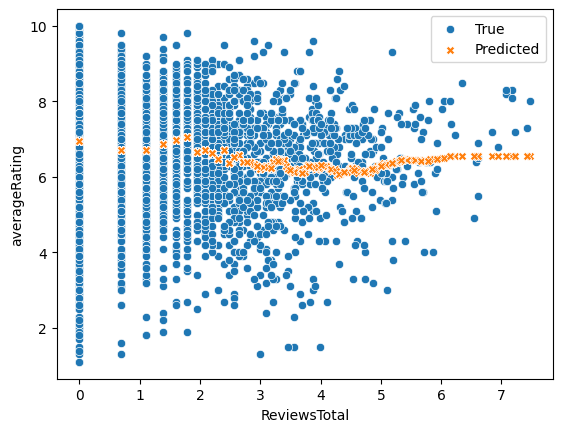

In [223]:
# Crea un nuovo DataFrame con le previsioni
df_test = pd.DataFrame({
    'ReviewsTotal': df_train.loc[X_test.index, 'ReviewsTotal'],
    'averageRating': y_test,
    'Predicted': y_pred
})

# Crea il grafico usando il nuovo DataFrame
sns.scatterplot(data=df_test, x="ReviewsTotal", y="averageRating", label="True")
sns.scatterplot(data=df_test, x="ReviewsTotal", y="Predicted", label="Predicted", marker="X")
plt.legend()
plt.show()

# Multiple Regression

In [271]:
import pandas as pd

# Supponiamo di avere due DataFrame df1 e df2
df_train_reg = pd.read_csv('train_reg.csv')

df_train = pd.read_csv('train_log.csv')

# Eseguiamo la left join
df_train = pd.merge(df_train, df_train_reg, on='originalTitle', how='left')
df_train.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ratingMean,ReviewsTotal,averageRating
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,40,0.000000,6.659294,0.693147,0.000000,21,tvEpisode,0.000000,False,False,1,['US'],"Action,Adventure,Animation",7.5,0.693147,7.5
1,Looping,"(5, 6]",1982,28,0.000000,2.484907,0.693147,0.000000,1,videoGame,0.000000,False,False,1,['XWG'],Action,5.5,0.000000,5.9
2,Idealnaya para,"(5, 6]",1992,92,0.000000,3.663562,0.693147,0.000000,24,movie,0.000000,False,False,1,['RU'],Comedy,5.5,0.693147,5.7
3,MasterChef Celebrity México,"(5, 6]",2021,53,0.000000,2.772589,3.135494,0.000000,56,tvSeries,0.000000,True,False,1,['MX'],Reality-TV,5.5,0.000000,5.7
4,Seutateueob,"(7, 8]",2020,80,0.693147,9.662625,5.852202,1.098612,47,tvSeries,0.693147,True,False,32,['KR'],"Comedy,Drama,Romance",7.5,6.124683,8.0


In [272]:
del df_train['originalTitle']
del df_train['rating']
del df_train['genres']
del df_train['countryOfOrigin']
del df_train['isAdult']
del df_train['canHaveEpisodes']
del df_train['titleType'] 
del df_train['ratingMean']

In [273]:
df_train

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,AwNmExWins,numRegions,ReviewsTotal,averageRating
0,1995,40,0.000000,6.659294,0.693147,0.000000,21,0.000000,1,0.693147,7.5
1,1982,28,0.000000,2.484907,0.693147,0.000000,1,0.000000,1,0.000000,5.9
2,1992,92,0.000000,3.663562,0.693147,0.000000,24,0.000000,1,0.693147,5.7
3,2021,53,0.000000,2.772589,3.135494,0.000000,56,0.000000,1,0.000000,5.7
4,2020,80,0.693147,9.662625,5.852202,1.098612,47,0.693147,32,6.124683,8.0
...,...,...,...,...,...,...,...,...,...,...,...
19419,1942,92,0.000000,4.304065,1.609438,0.000000,45,0.000000,14,1.791759,5.8
19420,1990,92,0.000000,2.772589,1.098612,0.000000,22,0.000000,1,0.693147,4.4
19421,2021,140,0.000000,7.848153,3.688879,1.386294,129,1.791759,5,3.912023,5.5
19422,1982,92,0.000000,8.010360,3.970292,0.693147,53,0.000000,26,4.736198,3.3


#### Reg

In [274]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [275]:
# Selezioniamo le variabili indipendenti (input) e la variabile dipendente (target)
X = df_train.drop(columns='ReviewsTotal')
y = df_train['ReviewsTotal']

# Dividiamo i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Creiamo il modello di regressione lineare
model = LinearRegression()

In [276]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Supponiamo che 'X' sia il DataFrame delle caratteristiche
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data.round(2))

          feature    VIF
0       startYear  43.21
1  runtimeMinutes   3.88
2       awardWins   2.04
3        numVotes  12.55
4     totalImages   3.46
5     totalVideos   1.57
6    totalCredits   2.13
7      AwNmExWins   2.32
8      numRegions   2.57
9   averageRating  32.01


In [277]:
del df_train['startYear']
# del df_train['numVotes']
del df_train['averageRating']

In [278]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Supponiamo che 'X' sia il DataFrame delle caratteristiche
vif_data = pd.DataFrame()
vif_data["feature"] =df_train.columns
vif_data["VIF"] = [variance_inflation_factor(df_train.values, i) for i in range(len(df_train.columns))]

print(vif_data)

          feature       VIF
0  runtimeMinutes  3.197618
1       awardWins  2.035983
2        numVotes  7.295446
3     totalImages  3.508333
4     totalVideos  1.587102
5    totalCredits  2.120557
6      AwNmExWins  2.318127
7      numRegions  2.735199
8    ReviewsTotal  3.803728


In [ ]:
# Addestriamo il modello sui dati di addestramento
model.fit(X_train, y_train)

print('Coefficients: \n', model.coef_.round(7))
print('Intercept: \n', model.intercept_)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test)

Coefficients: 
 [-3.400000e-01  1.548000e-01  5.886980e+00  4.180932e+01  7.030110e+00
  3.617973e+01 -2.511000e-02  9.046700e+00  3.412660e+00 -5.044030e+00]
Intercept: 
 5.938306206978368


runtimeMinutes: -0.003829  
awardWins: 0.001493  
numVotes: 0.056921  
totalImages: 0.411791  
totalVideos: 0.069732  
totalCredits: 0.395141  
AwNmExWins: -0.000233  
numRegions: 0.102147  
ReviewsTotal: 0.036063  

Vengono eliminate in contemporanea e cosi che numvotes arriva a un vif accettabili e la bonta del modello resta buona

In [280]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.729
MSE: 0.366
MAE: 0.464


#### Decision Tree

In [281]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [282]:
# Creiamo il modello di regressione lineare
model = DecisionTreeRegressor()

# Addestriamo il modello sui dati di addestramento
model.fit(X_train, y_train)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test)

In [283]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.612
MSE: 0.524
MAE: 0.430


#### K-nn

In [284]:
# Creiamo il modello di regressione lineare
model = KNeighborsRegressor()

# Addestriamo il modello sui dati di addestramento
model.fit(X_train, y_train)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test)

In [285]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.565
MSE: 0.588
MAE: 0.510
